In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import cv2
import tensorflow.keras as keras
import tensorflow as tf
from keras.models import Sequential
from keras import layers
from keras import optimizers
from keras.layers.convolutional import MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.layers import BatchNormalization
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dropout

In [2]:
# 얼리스탑핑 쉽게
def model_save_erstp(MODEL_SAVE_FOLDER_PATH, model_name, patience):
    save_file_name = model_name
    cb_checkpoint,cb_earlystopping = checkpoint_ez(MODEL_SAVE_FOLDER_PATH, save_file_name, patience)
    return cb_checkpoint,cb_earlystopping

def checkpoint_ez(MODEL_SAVE_FOLDER_PATH,save_file_name, patience) : 
    MODEL_SAVE_FOLDER_PATH = MODEL_SAVE_FOLDER_PATH
    data_name = save_file_name
    model_path = MODEL_SAVE_FOLDER_PATH + data_name + '.hdf5'
    # val_loss 값이 낮아졌을(좋아졌을) 때만 저장
    cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss',
                                    verbose=1, save_best_only=True
                                   )
    cb_earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience = patience, verbose=1,
                                                  mode='auto', baseline=None, restore_best_weights=False)
    return cb_checkpoint, cb_earlystopping

# 그래프 쉽게
def loss_graph(label1,label2,bottom,top):
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()
    loss_ax.plot(history.history['loss'], 'y', label=label1)
    loss_ax.plot(history.history['val_loss'], 'r', label=label2)
    acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    # acc_ax.set_ylabel('accuray')
    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')
    loss_ax.set_ylim(bottom,top)
    return plt.show()

# 모델 저장 def
def json_model_saver(MODEL_SAVE_FOLDER_PATH,file_name):
    # model save by json
    # load model 
    model = keras.models.load_model(MODEL_SAVE_FOLDER_PATH +file_name+ '.hdf5')
    # Save model with json format
    model_json = model.to_json()
    with open(MODEL_SAVE_FOLDER_PATH+file_name+'.json', "w") as json_file:
        json_file.write(model_json)
    # Save weight with h5 format
    model.save_weights( MODEL_SAVE_FOLDER_PATH +file_name +'.h5')
    return print("Saved model to disk : "+ file_name +'.h5')


In [3]:
path = '../9.data/1.accData_split/1.diff_heatmap/accident/'
path_no = '../9.data/1.accData_split/2.last/'

In [4]:
accList = os.listdir(path)
nonList = os.listdir(path_no)

In [5]:
returnNum = 0
for i in accList:
    if returnNum == 0:
        accImg = cv2.imread(path+i)
        accImg = cv2.resize(accImg, None, fx=0.1, fy=0.1, interpolation=cv2.INTER_AREA)
        accImg = np.ravel(accImg)
        accImg = np.expand_dims(accImg, 0)
        returnNum += 1
    else:
        temp = cv2.imread(path+i)
        temp = cv2.resize(temp, None, fx=0.1, fy=0.1, interpolation=cv2.INTER_AREA)
        temp = np.ravel(temp)
        temp = np.expand_dims(temp, 0)
        accImg = np.concatenate((accImg, temp), axis=0)
        
returnNum = 0
for i in nonList:
    if returnNum == 0:
        nonImg = cv2.imread(path_no+i)
        nonImg = cv2.resize(nonImg, None, fx=0.1, fy=0.1, interpolation=cv2.INTER_AREA)
        nonImg = np.ravel(nonImg)
        nonImg = np.expand_dims(nonImg, 0)
        returnNum += 1
    else:
        temp = cv2.imread(path_no+i)
        temp = cv2.resize(temp, None, fx=0.1, fy=0.1, interpolation=cv2.INTER_AREA)
        temp = np.ravel(temp)
        temp = np.expand_dims(temp, 0)
        nonImg = np.concatenate((nonImg, temp), axis=0)

In [6]:
accY = np.ones(1000)
nonY = np.zeros(962)

In [7]:
dataX = np.concatenate([accImg, nonImg])
dataY = np.concatenate([accY, nonY])

In [8]:
dataX = dataX/255

np.random.seed(0)
randomList = list(np.random.randint(1962, size = 1962))
dataX = dataX[randomList]
dataY = dataY[randomList]

In [17]:
nTrain = 1472
nTest = 490

x_train = dataX[:nTrain]
x_test = dataX[nTrain:]
y_train = dataY[:nTrain]
y_test = dataY[nTrain:]

In [21]:
# 데이터 reshape 및 차원 추가
x_train = x_train.reshape(x_train.shape[0],167,240,3)
x_test = x_test.reshape(x_test.shape[0],167,240,3)

In [25]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [26]:
y_train.shape

(1472, 2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 163, 236, 2)       152       
_________________________________________________________________
flatten (Flatten)            (None, 76936)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 153874    
Total params: 154,026
Trainable params: 154,026
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
118/118 [==============================] - ETA: 0s - loss: 0.0291 - accuracy: 0.9856
Epoch 00001: val_loss improved from inf to 0.00086, saving model to ..\1.modeltest.hdf5
118/118 [==============================] - 1s 12ms/step - loss: 0.0291 - accuracy: 0.9856 - val_loss: 8.6374e-04 - val_accuracy: 1.0000
Epoch 2/1000
112/118 [===========================>..] - ET

Epoch 27/1000
113/118 [===========================>..] - ETA: 0s - loss: 8.5191e-06 - accuracy: 1.0000
Epoch 00027: val_loss did not improve from 0.00086
118/118 [==============================] - 1s 8ms/step - loss: 8.6409e-06 - accuracy: 1.0000 - val_loss: 0.0489 - val_accuracy: 0.9966
Epoch 28/1000
114/118 [===========================>..] - ETA: 0s - loss: 8.1446e-06 - accuracy: 1.0000
Epoch 00028: val_loss did not improve from 0.00086
118/118 [==============================] - 1s 8ms/step - loss: 7.9133e-06 - accuracy: 1.0000 - val_loss: 0.0495 - val_accuracy: 0.9966
Epoch 29/1000
113/118 [===========================>..] - ETA: 0s - loss: 7.2789e-06 - accuracy: 1.0000
Epoch 00029: val_loss did not improve from 0.00086
118/118 [==============================] - 1s 8ms/step - loss: 7.1143e-06 - accuracy: 1.0000 - val_loss: 0.0489 - val_accuracy: 0.9966
Epoch 30/1000
113/118 [===========================>..] - ETA: 0s - loss: 6.8248e-06 - accuracy: 1.0000
Epoch 00030: val_loss did not 

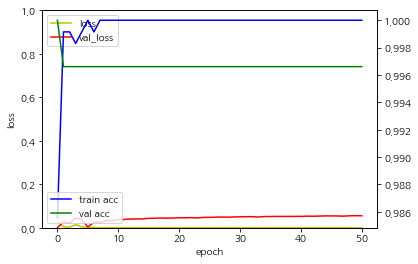

In [29]:
model_name = 'test'
MODEL_SAVE_FOLDER_PATH = '../1.model'
cb_checkpoint,cb_earlystopping = model_save_erstp(MODEL_SAVE_FOLDER_PATH, model_name, 50)

tf.keras.backend.clear_session()


model = Sequential()
model.add(layers.Conv2D(filters=2, kernel_size = 5 , input_shape=(167,240,3), activation='relu', kernel_initializer='he_normal')) 
model.add(layers.Flatten())
model.add(layers.Dense(units=2, activation='sigmoid'))
model.compile(loss ='binary_crossentropy', optimizer=optimizers.Adam(lr=0.001), metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train, shuffle=True,epochs=1000, batch_size=10, validation_split=0.2, callbacks=[cb_checkpoint,cb_earlystopping])
loss_graph('loss','val_loss',0,1)

In [30]:
loss, acc = model.evaluate(x_test, y_test)

16/16 [==============================] - 0s 8ms/step - loss: 3.3484e-04 - accuracy: 1.0000


In [198]:
y_test

,0.0,1.0
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
495,1,0
496,1,0
497,0,1
498,1,0


In [207]:
import matplotlib.pyplot as plt

plt.imshow(test[10])

NameError: name 'test' is not defined

In [121]:
test[0].shape

(51, 11)

In [120]:
img.shape

(1670, 2400, 3)

In [78]:
accPath = '../9.data/1.accData_split/1.diff_heatmap/accident/'
nonaccPath = '../9.data/1.accData_split/1.diff_heatmap/nonaccident/'

acc_list = os.listdir(accPath)
nonacc_list = os.listdir(nonaccPath)

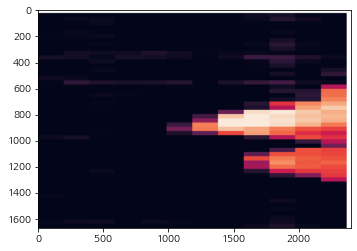

In [122]:
img = cv2.imread(accPath + acc_list[50])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [102]:
num = 0
for i in acc_list:    
    if num == 0:
        img = cv2.imread(accPath + i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        x_train = np.expand_dims(img, 0)
        num += 1
    else:
        img = cv2.imread(accPath + i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = np.expand_dims(img, 0)
        x_train = np.concatenate((x_train, img), axis=0)


KeyboardInterrupt: 

TypeError: Invalid shape (1, 1670, 2400, 3) for image data

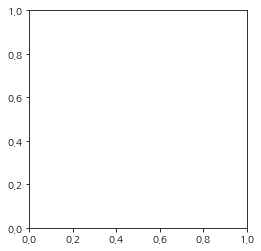

In [103]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [113]:
img = cv2.imread(accPath + acc_list[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)